**TASK 2: DATA PREPARATION**

Overview: The TikTok data team seeks to develop a machine learning model to assist in the classification of claims for user submissions. To begin, the data team needs to organize the raw dataset and prepare it for future exploratory data analysis. In this preliminary investigation, I aim to summarize column Data types, data value nonnull counts, relevant and irrelevant columns and understand the relationship between variables.

My goal is to construct a dataframe in Python, perform a cursory inspection of the provided dataset, and inform TikTok data team members of the findings.
This activity has three parts:

-Part 1: Understand the situation (Prepare and organize)

-Part 2: Understand the data (Compile summary statistics for later in depth EDA)

-Part 3: Understand the variables



In [1]:
#import data libraries and load dataset (tiktok_dataset.csv)
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

TikTok_df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Data analytics\Portfolio\Full_cycle projects\Google TikTok\tiktok_dataset.csv")

pd.set_option('display.max.row', 140)
pd.set_option('display.max.columns', 30)
TikTok_df

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


**Part 1: General observations of the dataset.**

In [2]:
#See number of rows and columns
'''
The dataset has 19382 rows and 12 columns
'''
TikTok_df.shape


(19382, 12)

In [3]:
#Observe columns datatype and count non-null values
'''
I observe that the dataset contains 7 columns with null values 
'''
TikTok_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [4]:
#Identify any rows with null values 
'''
I identify 298 rows containing null values. My rational is to drop these null values as they don't contain much 
valuable information and will skew the results. Also, our data sample size is large so removing these null values 
wont have a significant impact on our predictive model.
'''
TikTok_df[TikTok_df.isnull().any(axis=1)]



,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19084,19085,NaN,4380513697,39,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19085,19086,NaN,8352130892,60,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19086,19087,NaN,4443076562,25,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19087,19088,NaN,8328300333,7,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19088,19089,NaN,3968729520,8,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'video durationb (seconds)')

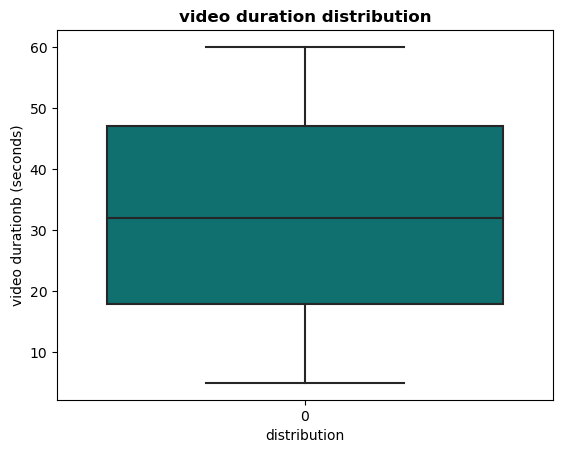

In [5]:
#See distribution for video_duration_sec column 

plt.title('video duration distribution', weight= 'bold')
sns.boxplot(data= TikTok_df['video_duration_sec'], showfliers = True, color = 'teal')

plt.xlabel('distribution')
plt.ylabel('video durationb (seconds)')

In [6]:
#Drop 298 rows with null values
TikTok_df.dropna(axis=0, inplace= True)
TikTok_df.shape


(19084, 12)

In [7]:
#Drop any duplicated rows 
'''
The dataset doesnt contain any duplicated rows
'''
TikTok_df.drop_duplicates(subset=['video_id'], inplace = True)
TikTok_df.shape

(19084, 12)

**Part 2: General descriptive statistics**

In [8]:
#Descriptive statistics for numeric columns 
TikTok_df.select_dtypes(include= ['number']).describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [9]:
 #How many values for claim and opinion in claim_status column 
'''
The dataset contains 9608 values for claim and 9476 values for opinion
'''

TikTok_df.groupby('claim_status')['video_id'].size().reset_index()

,claim_status,video_id
0,claim,9608
1,opinion,9476


Text(-10000, 0.8, 'The distribution is highly right-skewed, \n similar to the others. There are several outliers\n indicating videos with a high number of shares.')

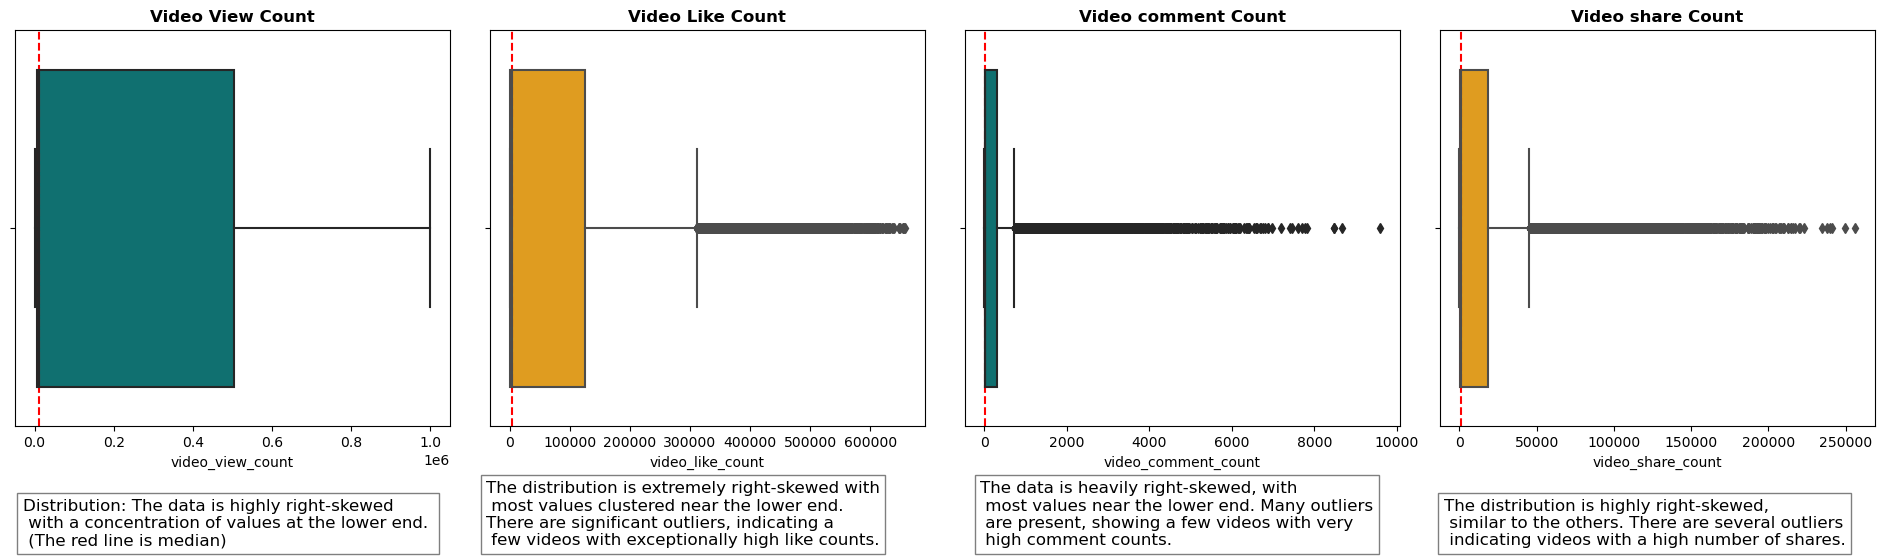

In [10]:
#Identify outliers for video view, like, share, comment count

fig, axs = plt.subplots(1, 4, figsize=(19, 4.9))

# First box plot for video view count
sns.boxplot(x=TikTok_df['video_view_count'], ax=axs[0], color='teal')
axs[0].set_title('Video View Count', weight='bold')
median_view = TikTok_df['video_view_count'].median()
axs[0].axvline(median_view, color='red', linestyle='--')

# Second box plot for video like count
sns.boxplot(x=TikTok_df['video_like_count'], ax=axs[1], color='orange')
axs[1].set_title('Video Like Count', weight='bold')
median_like = TikTok_df['video_like_count'].median()
axs[1].axvline(median_like, color='red', linestyle='--')

# Third box plot for video comment count
sns.boxplot(x=TikTok_df['video_comment_count'], ax=axs[2], color= 'teal');
axs[2].set_title('Video comment Count', weight='bold')
median_comment = TikTok_df['video_comment_count'].median()
axs[2].axvline(median_comment, color='red', linestyle='--')

#Fourth box plot for video share count
sns.boxplot(x=TikTok_df['video_share_count'], ax=axs[3], color= 'orange');
axs[3].set_title('Video share Count', weight='bold')
median_share = TikTok_df['video_share_count'].median()
axs[3].axvline(median_share, color='red', linestyle='--')

# Adjust layout
plt.tight_layout()

#Add description text
plt.text(-930000, 0.8, 'Distribution: The data is highly right-skewed\n with a concentration of values at the lower end. \n (The red line is median)', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(-630000, 0.8, 'The distribution is extremely right-skewed with\n most values clustered near the lower end. \nThere are significant outliers, indicating a\n few videos with exceptionally high like counts.', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(-310000, 0.8, 'The data is heavily right-skewed, with\n most values near the lower end. Many outliers\n are present, showing a few videos with very\n high comment counts.', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(-10000, 0.8, 'The distribution is highly right-skewed, \n similar to the others. There are several outliers\n indicating videos with a high number of shares.', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


Text(-930000, -2060, '(The vertical red line indicates the median)')

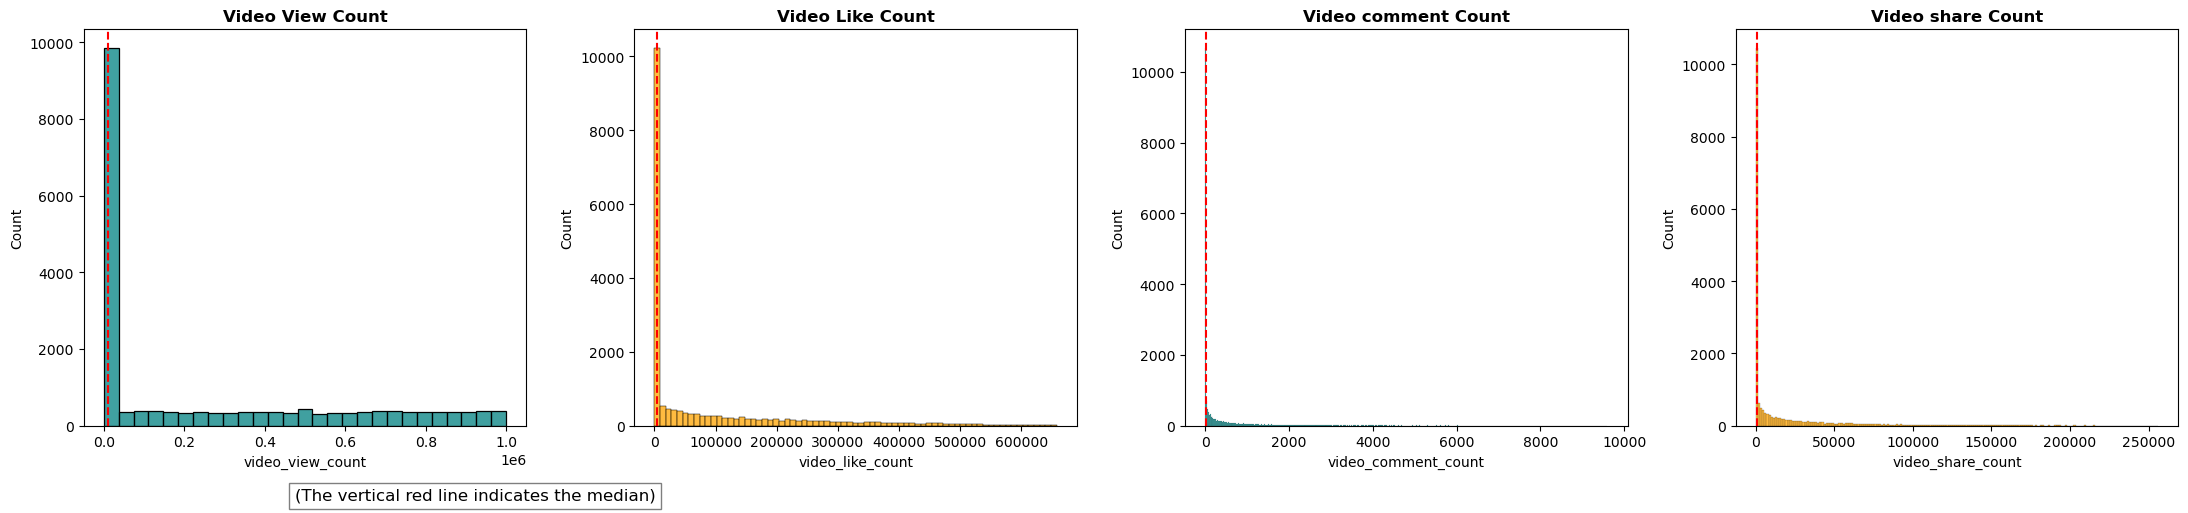

In [11]:
#Histogram distribution for video view, like, share, comment count

fig, axs = plt.subplots(1, 4, figsize=(22, 4.9))

# First box plot for video view count
sns.histplot(x=TikTok_df['video_view_count'], ax=axs[0], color='teal')
axs[0].set_title('Video View Count', weight='bold')
median_view = TikTok_df['video_view_count'].median()
axs[0].axvline(median_view, color='red', linestyle='--')

# Second box plot for video like count
sns.histplot(x=TikTok_df['video_like_count'], ax=axs[1], color='orange')
axs[1].set_title('Video Like Count', weight='bold')
median_like = TikTok_df['video_like_count'].median()
axs[1].axvline(median_like, color='red', linestyle='--')

# Third box plot for video comment count
sns.histplot(x=TikTok_df['video_comment_count'], ax=axs[2], color= 'teal');
axs[2].set_title('Video comment Count', weight='bold')
median_comment = TikTok_df['video_comment_count'].median()
axs[2].axvline(median_comment, color='red', linestyle='--')

#Fourth box plot for video share count
sns.histplot(x=TikTok_df['video_share_count'], ax=axs[3], color= 'orange');
axs[3].set_title('Video share Count', weight='bold')
median_share = TikTok_df['video_share_count'].median()
axs[3].axvline(median_share, color='red', linestyle='--')

# Adjust layout
plt.tight_layout()

plt.text(-930000, -2060, '(The vertical red line indicates the median)', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

**Additional findings about the dataset**

In [12]:
#Claim related videos tend to have more views
TikTok_df.groupby([ 'claim_status'])[['video_view_count']].agg(['mean','median'])

video_view_count          
                         mean    median
claim_status                           
claim           501029.452748  501555.0
opinion           4956.432250    4953.0

In [13]:
#Author ban status might help determine video claim status 
TikTok_df.groupby(['claim_status', 'author_ban_status'])['video_id'].count().reset_index()

,claim_status,author_ban_status,video_id
0,claim,active,6566
1,claim,banned,1439
2,claim,under review,1603
3,opinion,active,8817
4,opinion,banned,196
5,opinion,under review,463


In [14]:
#Data enrichment. I can derive deeper insights if we have the proportion of likes, shares, and comments per view.
TikTok_df['like_%'] = TikTok_df['video_like_count']/ TikTok_df['video_view_count']
TikTok_df['share_%'] = TikTok_df['video_share_count']/ TikTok_df['video_view_count']
TikTok_df['comment_%'] = TikTok_df['video_comment_count']/ TikTok_df['video_view_count']

TikTok_df.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,like_%,share_%,comment_%
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000702,0.000000
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.135111,0.004855
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.003168,0.000365
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.079569,0.001335
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.073175,0.002706


**Executive Summary**


Understand the data: 

  -The provided dataset is in long format, with 19382 rows and 12 columns 

  -Most of the numeric columns are in integer or float datatypes; however, claim_status, verified_status, and author_ban_status are currently in object types and they should be boolean masked in order to build our predictive model. 

  -The dataset contains 298 rows with null values. I consider to drop these as the null values appeared simultaneously to many key columns and our sample size is large enough to yield an accurate result. 

  -There are no duplicated values found in the dataset. 
  
  -The counts of each claim status are quite balanced. There are 9,608 claims and 9,476 opinions.

  -View, like, comment, share count are heavily right skewed, suggesting there are some significant outlier videos with significant audience engagement 
  




Preliminary findings:
  1. Claim videos have more views: By grouping video claim status on their mean and median video view count, I discovered that the mean and median number of views for 'claim' is higher than 'opinion'. In other words, people watch more videos identified as 'claim' rather than 'opinion'. 

  2. Variables like author ban status, verified status, and video view count are important for our predictive model

  3. I created three extra columns to calculate proportion of like, comment, share per view. These new columns may help to further derive deeper insights.

  

The next step: In summary, I believe that video view count, author ban status, share count may be some key independent variables for our predictive model. However, we might discover more relevant variables as we progression to later stages of the project. With the key variables identified and the initial investigation of the claims classification dataset, the process of exploratory data analysis can begin.


